In [14]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
merge_data_kanto = pd.read_csv('../../../data/kanto_stations_pca.csv')
merge_data_kansai = pd.read_csv('../data/kansai_stations_pca.csv')

In [16]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = merge_data_kanto[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    750
1    301
2    596
3    384
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

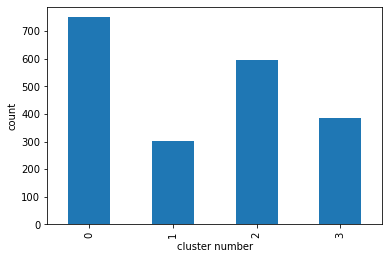

In [17]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=4, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number', index=merge_data_kanto.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [18]:
# データの列の絞り込み
pc2 = merge_data_kansai[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc2)
pc_std2 = sc.transform(pc2)

# クラスターの重心を予測
ret = kmeans.predict(pc_std2)

ret

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [19]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

0    871
1     16
2    151
3    657
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

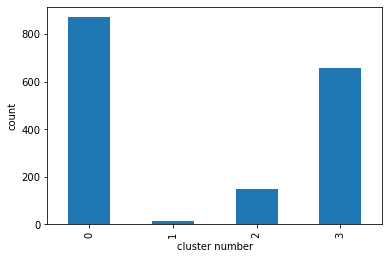

In [20]:
# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(ret, name='cluster_number', index=merge_data_kansai.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [21]:
path = f'../data/target_kansai_stations_with_stats.csv'
stations = pd.read_csv(path)
stations.head(10)



,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,387.0,78.677607,1.074704,0.00000,184.0,150.139302,142.085853,34322.719402,17515.236022,105.845332
1,1141502,1141502,坂田,NaN,NaN,11415,25,521-0062,米原市宇賀野,136.287743,...,289.0,108.530997,1.036659,0.00346,146.0,90.807199,85.331388,26607.644980,14312.609927,66.622367
2,1141503,1141503,田村,NaN,NaN,11415,25,526-0829,長浜市田村町,136.281813,...,157.0,112.335363,1.053073,0.00000,78.0,73.056087,66.474457,23062.044030,11607.790799,51.336710
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,491.0,77.684851,1.064590,0.00000,226.0,169.449737,160.531330,39682.901005,20010.420220,118.562355
4,1141505,1141505,虎姫,NaN,NaN,11415,25,529-0144,滋賀県長浜市大寺町細田1043,136.257385,...,284.0,95.743810,1.035450,0.00000,133.0,85.460993,77.883171,22894.488222,11447.244111,55.991685
5,1141506,1141506,河毛,NaN,NaN,11415,25,529-0317,滋賀県長浜市湖北町山脇560,136.249519,...,179.0,109.721838,1.091130,0.00000,92.0,75.715154,60.252200,20396.436630,10472.263716,49.054888
6,1141507,1141507,高月,NaN,NaN,11415,25,529-0241,滋賀県長浜市高月町落川33-26,136.237716,...,241.0,106.930896,1.034531,0.00000,119.0,95.709469,79.578660,27554.679744,13856.551287,63.985544
7,1141508,1141508,木ノ本,NaN,NaN,11415,25,529-0425,滋賀県長浜市木之本町木之本1543,136.221706,...,355.0,87.229924,1.057388,0.00000,143.0,126.345700,120.106406,31217.486124,16100.821607,74.351585
8,1141509,1141509,余呉,NaN,NaN,11415,25,529-0521,滋賀県長浜市余呉町下余呉1727,136.197591,...,43.0,207.687767,1.048859,0.00000,30.0,26.392230,23.992937,14284.713051,7142.356525,23.992937
9,1141510,1141510,近江塩津,NaN,NaN,11415,25,529-0706,滋賀県長浜市西浅井町余245,136.151236,...,39.0,159.238385,1.093543,0.00000,21.0,49.898185,33.754655,18228.385390,9114.192695,30.819468


In [22]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([stations, pd.Series(labels, index=stations.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km,cluster_number
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,78.677607,1.074704,0.00000,184.0,150.139302,142.085853,34322.719402,17515.236022,105.845332,3.0
1,1141502,1141502,坂田,NaN,NaN,11415,25,521-0062,米原市宇賀野,136.287743,...,108.530997,1.036659,0.00346,146.0,90.807199,85.331388,26607.644980,14312.609927,66.622367,3.0
2,1141503,1141503,田村,NaN,NaN,11415,25,526-0829,長浜市田村町,136.281813,...,112.335363,1.053073,0.00000,78.0,73.056087,66.474457,23062.044030,11607.790799,51.336710,3.0
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,77.684851,1.064590,0.00000,226.0,169.449737,160.531330,39682.901005,20010.420220,118.562355,3.0
4,1141505,1141505,虎姫,NaN,NaN,11415,25,529-0144,滋賀県長浜市大寺町細田1043,136.257385,...,95.743810,1.035450,0.00000,133.0,85.460993,77.883171,22894.488222,11447.244111,55.991685,3.0


In [23]:
stations_0 = stations_with_cluster[stations_with_cluster['cluster_number'] == 0]
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
stations_3 = stations_with_cluster[stations_with_cluster['cluster_number'] == 3]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue', 'green']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='circuity_avg', y='streets_per_node_avg', color=colors[i], label='cluster{i}', ax=ax)

TypeError: list indices must be integers or slices, not float

In [24]:
import folium
center_lat, center_lon = (34.6413, 135.5629) # 大阪の緯度経度

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in stations_with_cluster.iterrows():
    color = 'pink' if station['cluster_number'] == 0 else 'blue' if station['cluster_number'] == 1 else 'red' if station['cluster_number'] == 2 else 'green'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [25]:
stations_with_cluster.to_csv('../data/kansai_stations_with_cluster2.csv', index=False)